# Pravin Prakashrao Kulkarni

https://github.com/pravink83/AIML-EnsembleTechniques.git

In [1]:
# Import Libraries

import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Load Data

In [2]:
bankData = pd.read_csv('bank-full.csv')
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Deliverable – 1

### Univariate analysis

In [3]:
# Shape of data
bankData.shape

(45211, 17)

In [4]:
rowCount = bankData.shape[0]
rowCount

45211

In [5]:
# Data Types
bankData.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
# Null check
bankData.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [7]:
# number of unique values
bankData.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [8]:
# Unique values & counts i.e. value counts

for col in bankData.columns:
    print('----------- Value Counts of ', col, ' -----------')
    print(bankData.groupby(by=col)[col].value_counts())
    print('-------------------------------------')
    print()
    

----------- Value Counts of  age  -----------
age  age
18   18      12
19   19      35
20   20      50
21   21      79
22   22     129
           ... 
90   90       2
92   92       2
93   93       2
94   94       1
95   95       2
Name: age, Length: 77, dtype: int64
-------------------------------------

----------- Value Counts of  job  -----------
job            job          
admin.         admin.           5171
blue-collar    blue-collar      9732
entrepreneur   entrepreneur     1487
housemaid      housemaid        1240
management     management       9458
retired        retired          2264
self-employed  self-employed    1579
services       services         4154
student        student           938
technician     technician       7597
unemployed     unemployed       1303
unknown        unknown           288
Name: job, dtype: int64
-------------------------------------

----------- Value Counts of  marital  -----------
marital   marital 
divorced  divorced     5207
married   marri

In [9]:
# Statistical summary of numeric columns
bankData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [10]:
def getQuartileCounts(col):
    print('Quartile Analysis of ', col)
    print()
    Min = bankData[col].min()
    Max = bankData[col].max()
    Mean = bankData[col].mean()
    Median = bankData[col].median()
    Q1 = bankData[col].quantile(q=0.25)
    Q2 = bankData[col].quantile(q=0.50)
    Q3 = bankData[col].quantile(q=0.75)
    IQR = Q3-Q1
    Minimum = Q1 - (1.5 * IQR)
    Maximum = Q3 + (1.5 * IQR)
    LeftOutlierCount = bankData[bankData[col]<Minimum].shape[0]
    Q1Count = bankData[(bankData[col]>=Minimum) & (bankData[col]<=Q1)].shape[0]
    Q2Count = bankData[(bankData[col]>Q1) & (bankData[col]<=Q2)].shape[0]
    Q3Count = bankData[(bankData[col]>Q2) & (bankData[col]<=Q3)].shape[0]
    Q4Count = bankData[(bankData[col]>Q3) & (bankData[col]<=Maximum)].shape[0]
    RightOutlierCount = bankData[bankData[col]>Maximum].shape[0]
    print('Min ', Min)
    print('Max ', Max)
    print('Mean ', Mean)
    print('Median ', Median)
    print()
    print('25th percentile Q1 ', Q1)
    print('50th percentile Q2 ', Q2)
    print('75th percentile Q3 ', Q3)
    print('IQR ', IQR)
    print('Minimum = Q1 - 1.5*IQR = ', Minimum)
    print('Maximum = Q3 + 1.5*IQR = ', Maximum)
    print()
    print('Left outlier count i.e. < Minimum  ', LeftOutlierCount)
    print('>= Minimum and <= Q1 count         ', Q1Count)
    print('> Q1 and <= Q2 count               ', Q2Count)
    print('> Q2 and <= Q3 count               ', Q3Count)
    print('> Q3 and <= Maximum                ', Q4Count)
    print('Right outlier count i.e. > Maximum ', RightOutlierCount)
    print('Total Outliers ', (LeftOutlierCount+RightOutlierCount), '  ', (LeftOutlierCount+RightOutlierCount)*100/rowCount, '%')
    print()
    if(Mean > Median):
        print('Distribution is Right Skewed because Mean > Median')
    elif(Mean < Median):
        print('Distribution is Left Skewed because Mean < Median')
    else:
        print('Distribution is Symmetric because Mean = Median')
    
def plotUnivariate(col, pltType):
    if (pltType == 'box-dist'):
        fig, axes = plt.subplots(1, 2, figsize=[15,5])
        fig.tight_layout(pad=5.0)
        getQuartileCounts(col)
        sns.boxplot(data=bankData, x=col, ax=axes[0]);
        sns.distplot(bankData[col], ax=axes[1]);
    elif(pltType == 'count'):
        fig = plt.figure(figsize=[20,5])
        sns.countplot(data=bankData, x=col);
    elif(pltType == 'box-kde'):
        fig, axes = plt.subplots(1, 2, figsize=[15,5])
        fig.tight_layout(pad=5.0)
        getQuartileCounts(col)
        sns.boxplot(data=bankData, x=col, ax=axes[0]);
        sns.kdeplot(bankData[col], bw=1.5, ax=axes[1]);
    elif(pltType== 'dist'):
        fig = plt.figure(figsize=[20,5])
        sns.distplot(bankData[col]);

Quartile Analysis of  age

Min  18
Max  95
Mean  40.93621021432837
Median  39.0

25th percentile Q1  33.0
50th percentile Q2  39.0
75th percentile Q3  48.0
IQR  15.0
Minimum = Q1 - 1.5*IQR =  10.5
Maximum = Q3 + 1.5*IQR =  70.5

Left outlier count i.e. < Minimum   0
>= Minimum and <= Q1 count          13083
> Q1 and <= Q2 count                10279
> Q2 and <= Q3 count                10661
> Q3 and <= Maximum                 10701
Right outlier count i.e. > Maximum  487
Total Outliers  487    1.0771714848156422 %

Distribution is Right Skewed because Mean > Median


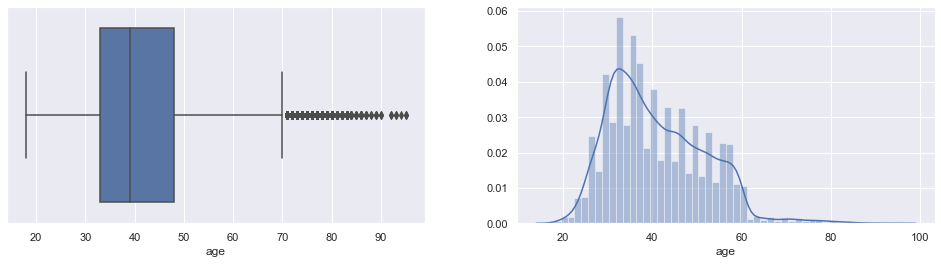

In [11]:
# Plot for age
plotUnivariate('age', 'box-dist')

Quartile Analysis of  balance

Min  -8019
Max  102127
Mean  1362.2720576850766
Median  448.0

25th percentile Q1  72.0
50th percentile Q2  448.0
75th percentile Q3  1428.0
IQR  1356.0
Minimum = Q1 - 1.5*IQR =  -1962.0
Maximum = Q3 + 1.5*IQR =  3462.0

Left outlier count i.e. < Minimum   17
>= Minimum and <= Q1 count          11300
> Q1 and <= Q2 count                11291
> Q2 and <= Q3 count                11306
> Q3 and <= Maximum                 6585
Right outlier count i.e. > Maximum  4712
Total Outliers  4729    10.459843843312468 %

Distribution is Right Skewed because Mean > Median


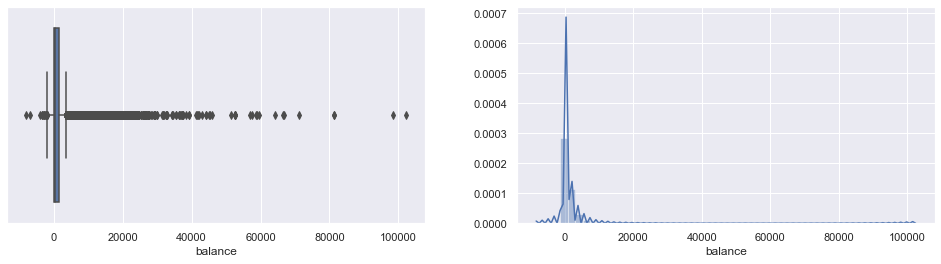

In [12]:
# Plot for balance
plotUnivariate('balance', 'box-dist')

Quartile Analysis of  day

Min  1
Max  31
Mean  15.80641879188693
Median  16.0

25th percentile Q1  8.0
50th percentile Q2  16.0
75th percentile Q3  21.0
IQR  13.0
Minimum = Q1 - 1.5*IQR =  -11.5
Maximum = Q3 + 1.5*IQR =  40.5

Left outlier count i.e. < Minimum   0
>= Minimum and <= Q1 count          11640
> Q1 and <= Q2 count                11718
> Q2 and <= Q3 count                10782
> Q3 and <= Maximum                 11071
Right outlier count i.e. > Maximum  0
Total Outliers  0    0.0 %

Distribution is Left Skewed because Mean < Median


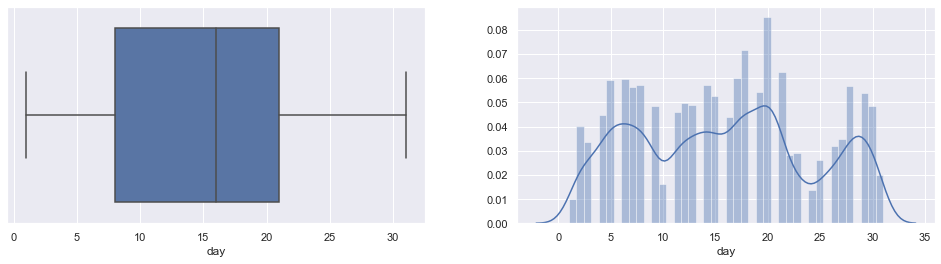

In [13]:
# Plot for day
plotUnivariate('day', 'box-dist')

Quartile Analysis of  duration

Min  0
Max  4918
Mean  258.1630797814691
Median  180.0

25th percentile Q1  103.0
50th percentile Q2  180.0
75th percentile Q3  319.0
IQR  216.0
Minimum = Q1 - 1.5*IQR =  -221.0
Maximum = Q3 + 1.5*IQR =  643.0

Left outlier count i.e. < Minimum   0
>= Minimum and <= Q1 count          11375
> Q1 and <= Q2 count                11285
> Q2 and <= Q3 count                11290
> Q3 and <= Maximum                 8026
Right outlier count i.e. > Maximum  3235
Total Outliers  3235    7.155338302625467 %

Distribution is Right Skewed because Mean > Median


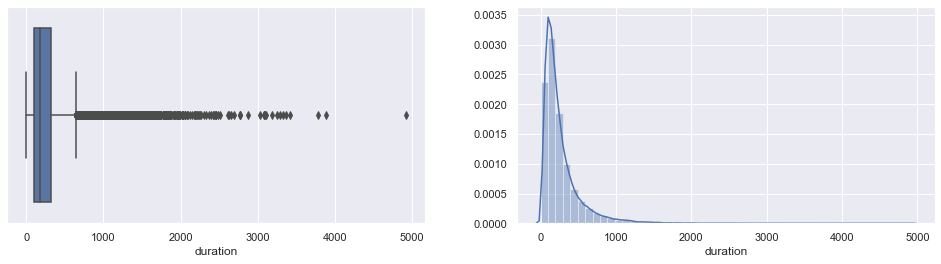

In [14]:
# Plot for duration
plotUnivariate('duration', 'box-dist')

Quartile Analysis of  campaign

Min  1
Max  63
Mean  2.763840658246887
Median  2.0

25th percentile Q1  1.0
50th percentile Q2  2.0
75th percentile Q3  3.0
IQR  2.0
Minimum = Q1 - 1.5*IQR =  -2.0
Maximum = Q3 + 1.5*IQR =  6.0

Left outlier count i.e. < Minimum   0
>= Minimum and <= Q1 count          17544
> Q1 and <= Q2 count                12505
> Q2 and <= Q3 count                5521
> Q3 and <= Maximum                 6577
Right outlier count i.e. > Maximum  3064
Total Outliers  3064    6.7771117648359915 %

Distribution is Right Skewed because Mean > Median


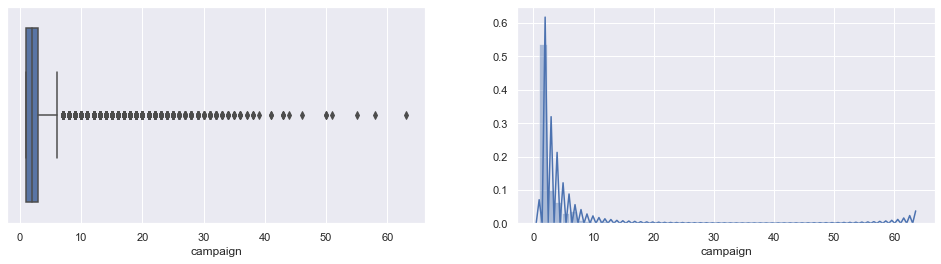

In [15]:
# Plot for campaign
plotUnivariate('campaign', 'box-dist')

Quartile Analysis of  pdays

Min  -1
Max  871
Mean  40.19782796222158
Median  -1.0

25th percentile Q1  -1.0
50th percentile Q2  -1.0
75th percentile Q3  -1.0
IQR  0.0
Minimum = Q1 - 1.5*IQR =  -1.0
Maximum = Q3 + 1.5*IQR =  -1.0

Left outlier count i.e. < Minimum   0
>= Minimum and <= Q1 count          36954
> Q1 and <= Q2 count                0
> Q2 and <= Q3 count                0
> Q3 and <= Maximum                 0
Right outlier count i.e. > Maximum  8257
Total Outliers  8257    18.263254517705867 %

Distribution is Right Skewed because Mean > Median


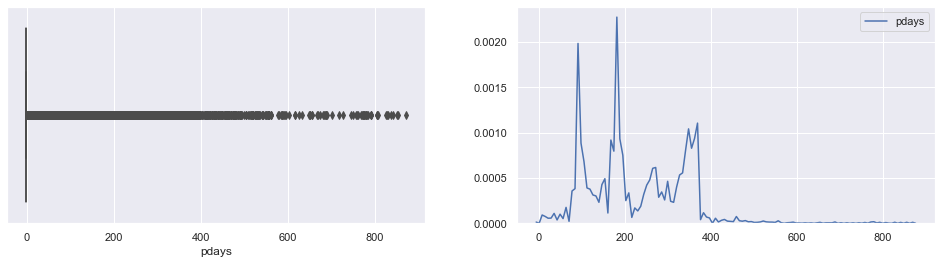

In [16]:
# Plot for pdays
plotUnivariate('pdays', 'box-kde')

Quartile Analysis of  previous

Min  0
Max  275
Mean  0.5803233726305546
Median  0.0

25th percentile Q1  0.0
50th percentile Q2  0.0
75th percentile Q3  0.0
IQR  0.0
Minimum = Q1 - 1.5*IQR =  0.0
Maximum = Q3 + 1.5*IQR =  0.0

Left outlier count i.e. < Minimum   0
>= Minimum and <= Q1 count          36954
> Q1 and <= Q2 count                0
> Q2 and <= Q3 count                0
> Q3 and <= Maximum                 0
Right outlier count i.e. > Maximum  8257
Total Outliers  8257    18.263254517705867 %

Distribution is Right Skewed because Mean > Median


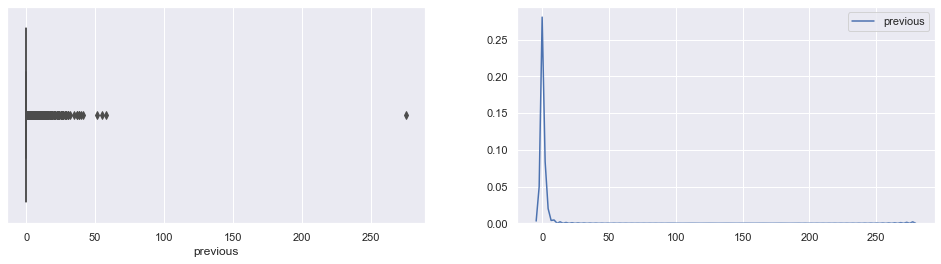

In [17]:
# Plot for previous
plotUnivariate('previous', 'box-kde')

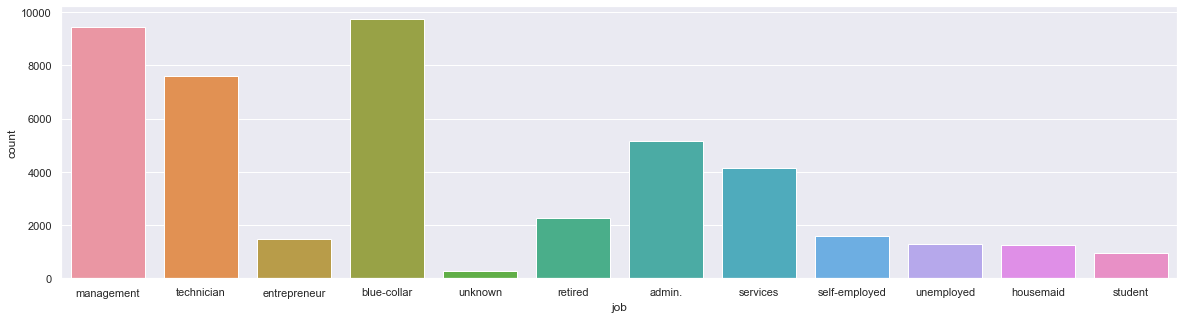

In [18]:
# Plot for job
plotUnivariate('job', 'count')

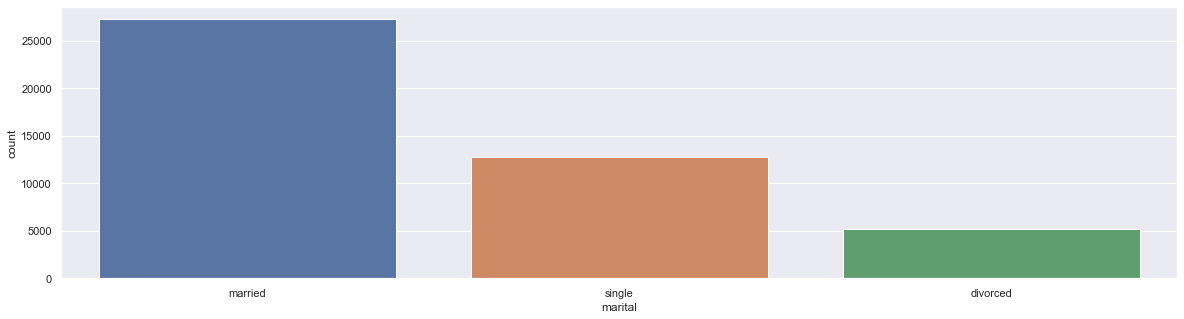

In [19]:
# Plot for marital
plotUnivariate('marital', 'count')

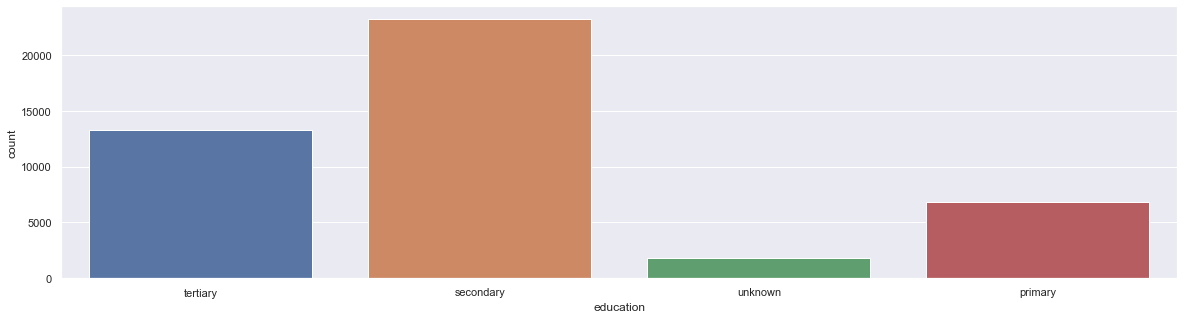

In [20]:
# Plot for education
plotUnivariate('education', 'count')

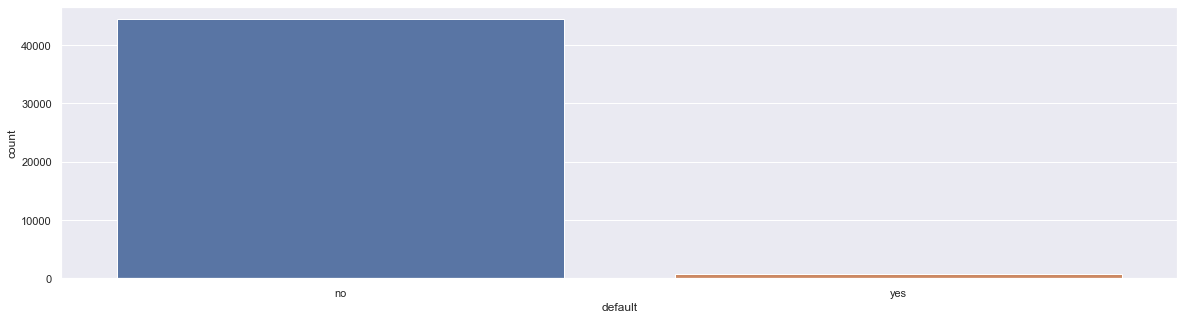

In [21]:
# Plot for default
plotUnivariate('default', 'count')

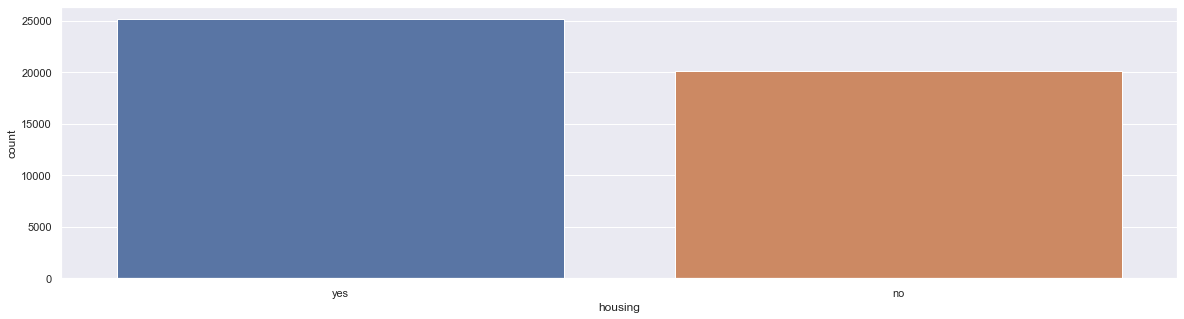

In [22]:
# Plot for housing
plotUnivariate('housing', 'count')

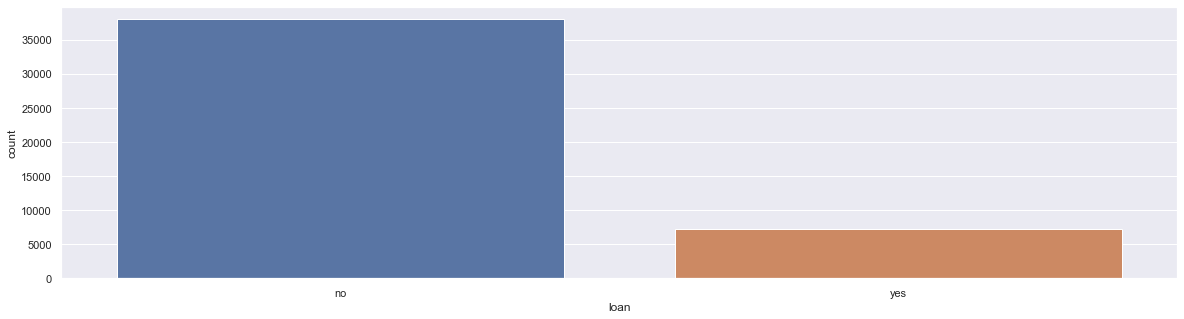

In [23]:
# Plot for loan
plotUnivariate('loan', 'count')

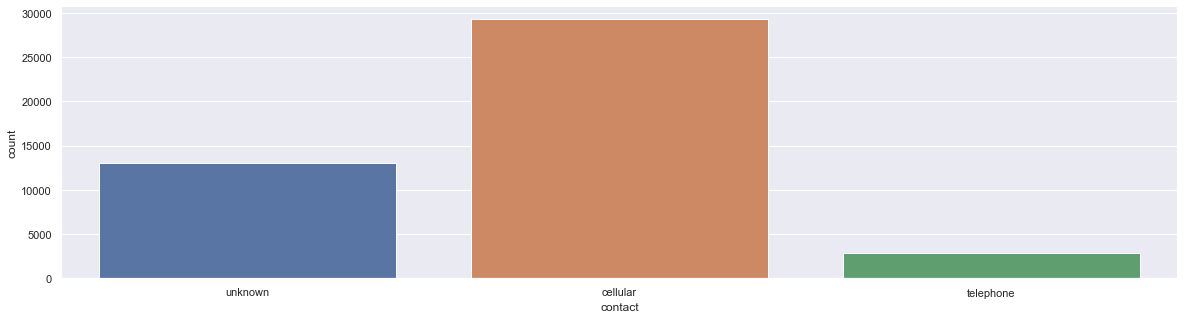

In [24]:
# Plot for contact
plotUnivariate('contact', 'count')

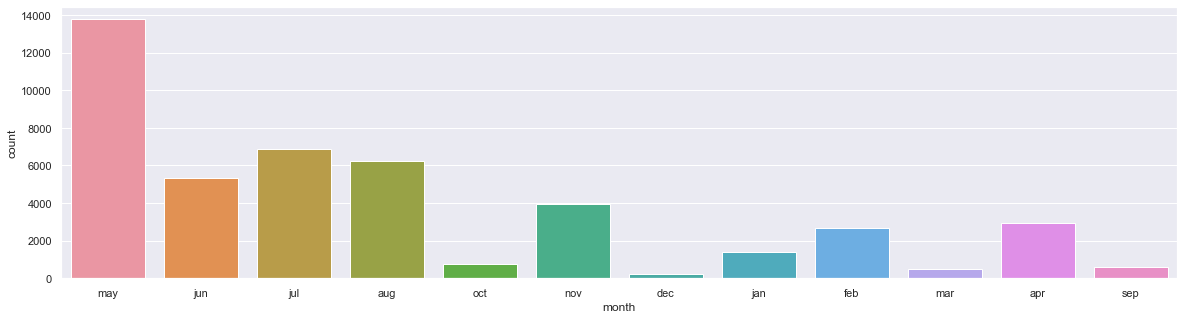

In [25]:
# Plot for month
plotUnivariate('month', 'count')

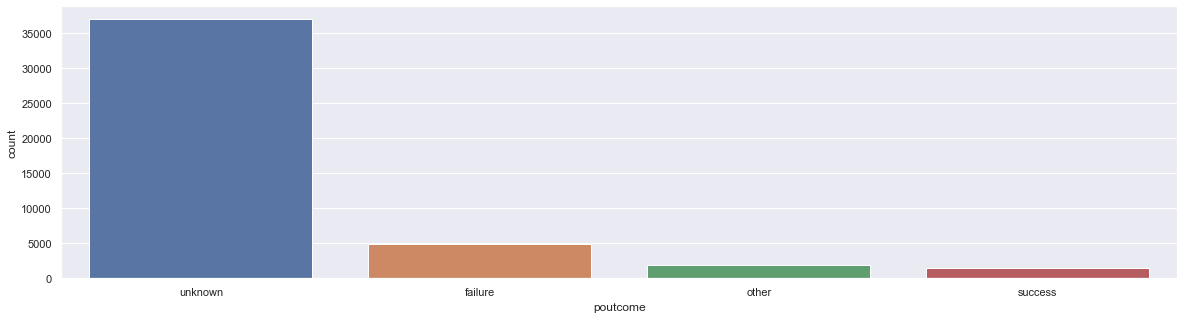

In [26]:
# Plot for poutcome
plotUnivariate('poutcome', 'count')

### Univariate analysis of following columns shows that there are many outliers and the data is skewed.
<ul>
    <li>age</li>
    <li>balance</li>
    <li>duration</li>
    <li>campaign</li>
    <li>pdays</li>
    <li>previous</li>
</ul>


### The outlier treatment plan for various columns – (more details in section Deliverable 2)
<ul>
    <li>
        Binning – create bins to represent range of values.
        <ul>
            <li>age</li>
            <li>balance</li>
            <li>duration</li>
            <li>pdays</li>
        </ul>
    </li>
    <li>
        No treatment – because there are only limited number of unique values and assuming those should be lightweight to be handled by the model.
        <ul>
            <li>campaign – only 48 unique values.</li>
            <li>previous – only 41 unique values.</li>
        </ul>
    </li>
</ul>

### Multivariate analysis

In [27]:
pd.get_dummies(bankData, columns=['Target'], drop_first=True).corr()

,age,balance,day,duration,campaign,pdays,previous,Target_yes
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
Target_yes,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


#### Analysis above shows that there is very weak relationship between the columns.

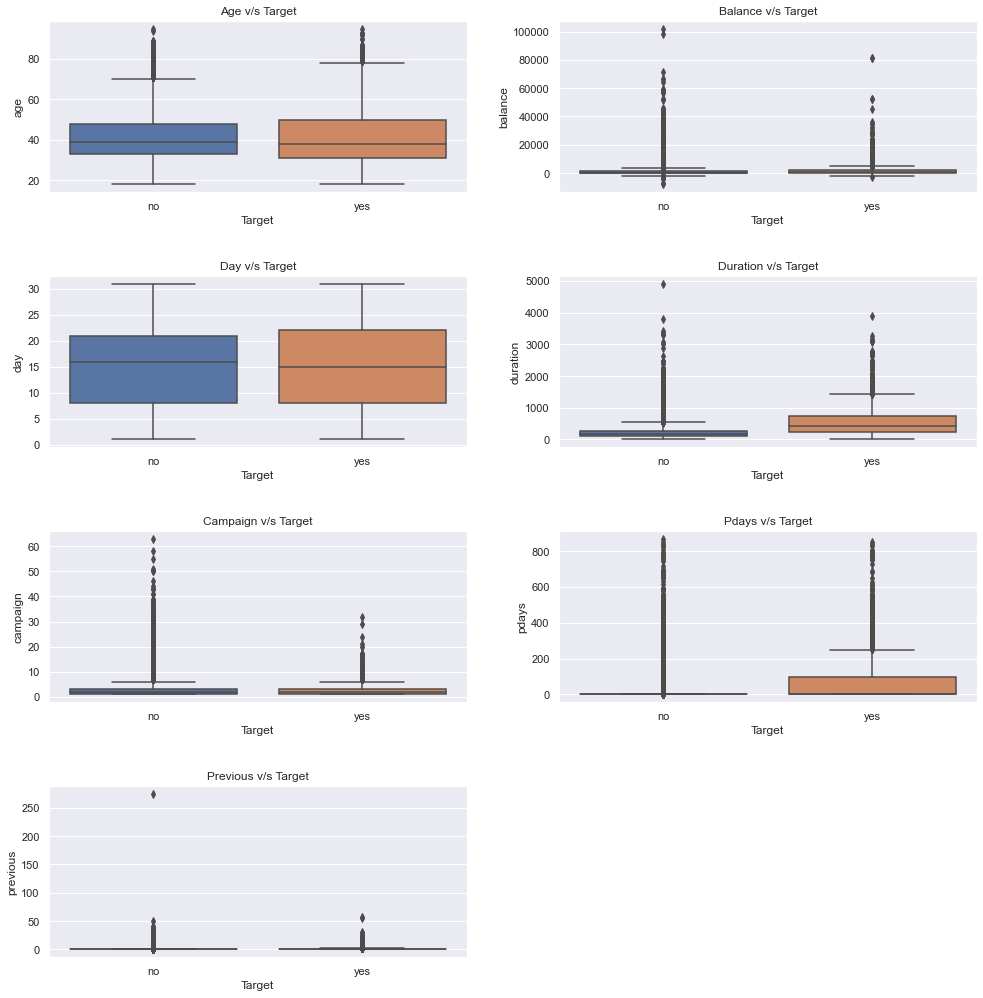

In [28]:
# Bivariate - BoxPlots
# Comparing all numeric columns with Target column

figure, axes = plt.subplots(4, 2, figsize=(15,15))
figure.tight_layout(pad=5.0)

sns.boxplot(bankData['Target'], bankData['age'], ax=axes[0,0]).set_title('Age v/s Target');
sns.boxplot(bankData['Target'], bankData['balance'], ax=axes[0,1]).set_title('Balance v/s Target');
sns.boxplot(bankData['Target'], bankData['day'], ax=axes[1,0]).set_title('Day v/s Target');
sns.boxplot(bankData['Target'], bankData['duration'], ax=axes[1,1]).set_title('Duration v/s Target');
sns.boxplot(bankData['Target'], bankData['campaign'], ax=axes[2,0]).set_title('Campaign v/s Target');
sns.boxplot(bankData['Target'], bankData['pdays'], ax=axes[2,1]).set_title('Pdays v/s Target');
sns.boxplot(bankData['Target'], bankData['previous'], ax=axes[3,0]).set_title('Previous v/s Target');
axes[3,1].set_visible(False);

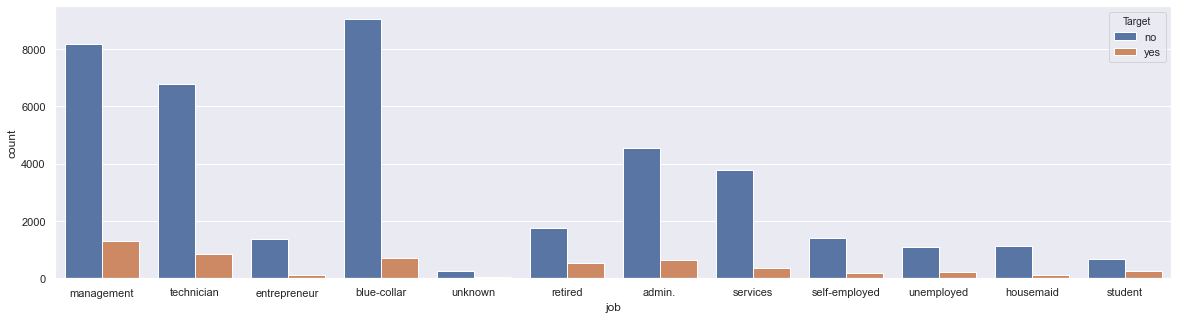

In [29]:
# Bivariate - histograms
# Comparing all categorical columns with Target column with help of age column

fig = plt.figure(figsize=[20,5])
sns.countplot(data=bankData, x='job', hue='Target');

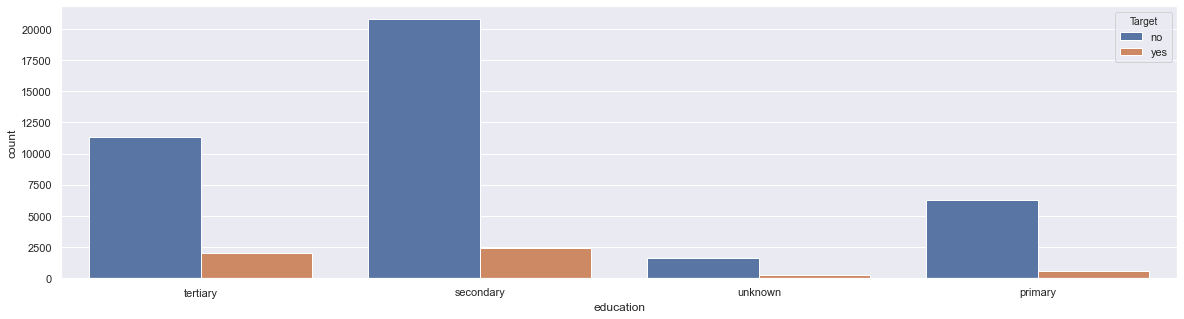

In [30]:
fig = plt.figure(figsize=[20,5])
sns.countplot(data=bankData, x='education', hue='Target');

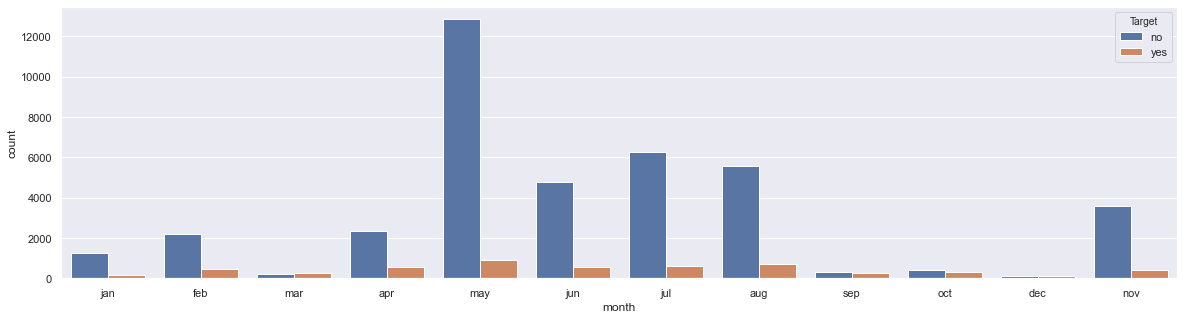

In [31]:
# To display the graph ordered by month, set month number in monthNum column and then sort by it.

g = bankData.groupby(by=['month','Target'])['month'].size().rename('count')
d = pd.DataFrame(g)
d = d.reset_index()
d.loc[d['month'] == 'jan', 'monthNum'] = 1
d.loc[d['month'] == 'feb', 'monthNum'] = 2
d.loc[d['month'] == 'mar', 'monthNum'] = 3
d.loc[d['month'] == 'apr', 'monthNum'] = 4
d.loc[d['month'] == 'may', 'monthNum'] = 5
d.loc[d['month'] == 'jun', 'monthNum'] = 6
d.loc[d['month'] == 'jul', 'monthNum'] = 7
d.loc[d['month'] == 'aug', 'monthNum'] = 8
d.loc[d['month'] == 'sep', 'monthNum'] = 9
d.loc[d['month'] == 'oct', 'monthNum'] = 10
d.loc[d['month'] == 'nov', 'monthNum'] = 12
d.loc[d['month'] == 'dec', 'monthNum'] = 12
#d

fig = plt.figure(figsize=[20,5])
sns.barplot(data=d.sort_values(by='monthNum'), x='month', y='count', hue='Target');

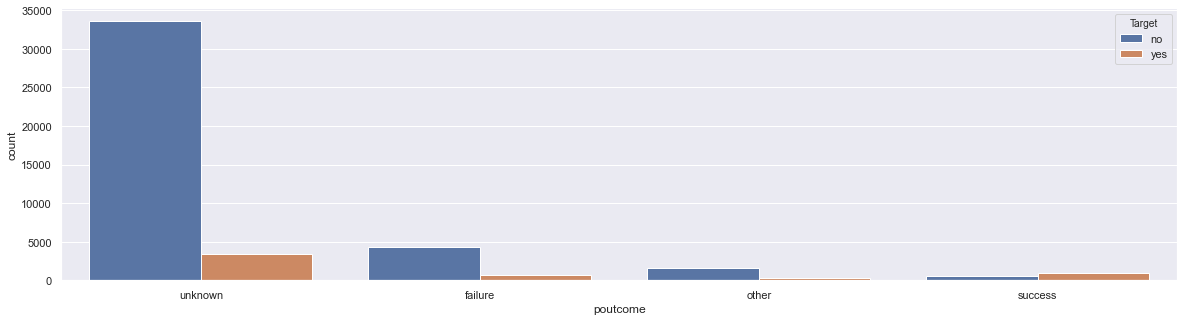

In [32]:
fig = plt.figure(figsize=[20,5])
sns.countplot(data=bankData, x='poutcome', hue='Target');

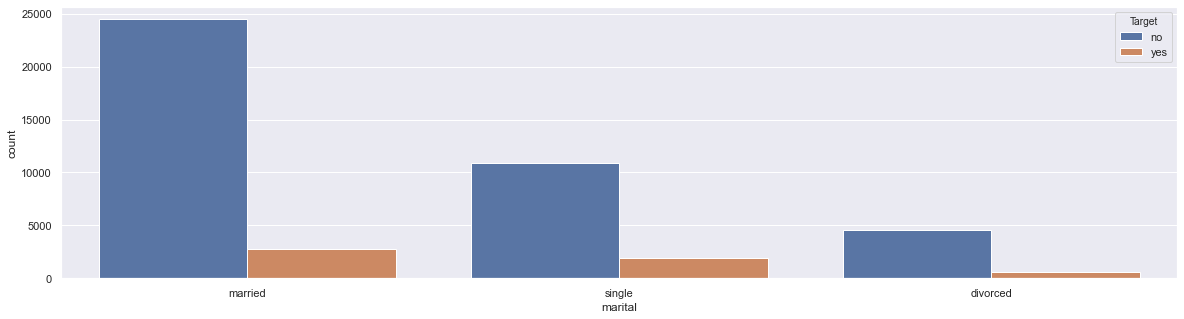

In [33]:
fig = plt.figure(figsize=[20,5])
sns.countplot(data=bankData, x='marital', hue='Target');

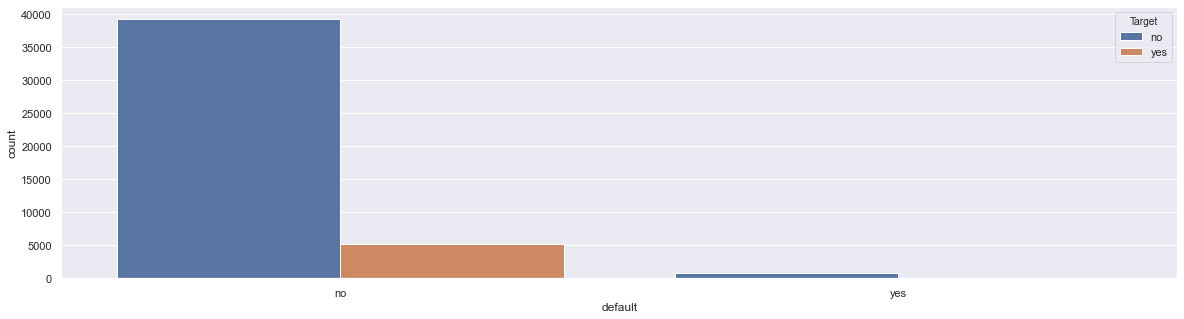

In [34]:
fig = plt.figure(figsize=[20,5])
sns.countplot(data=bankData, x='default', hue='Target');

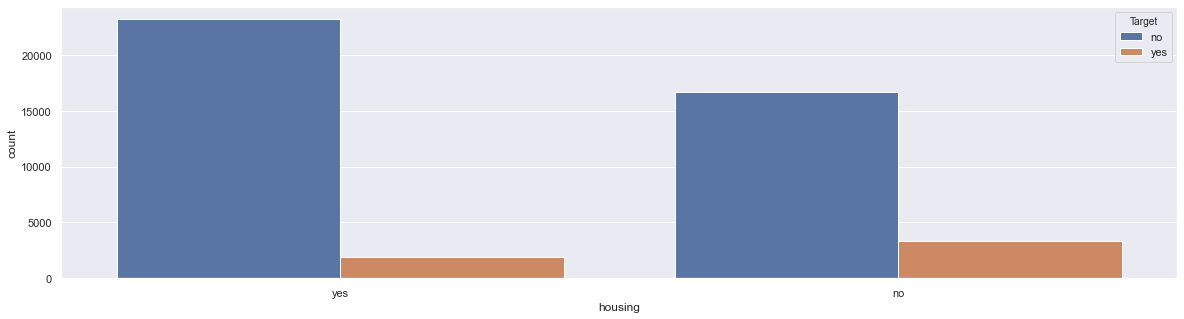

In [35]:
fig = plt.figure(figsize=[20,5])
sns.countplot(data=bankData, x='housing', hue='Target');

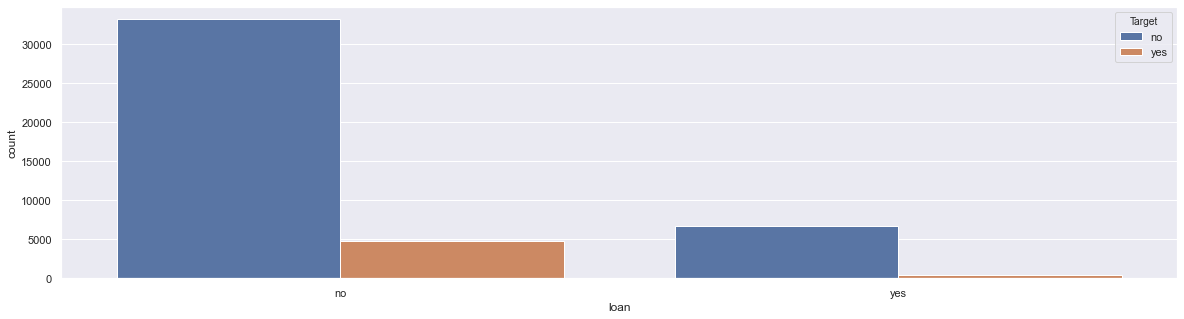

In [36]:
fig = plt.figure(figsize=[20,5])
sns.countplot(data=bankData, x='loan', hue='Target');

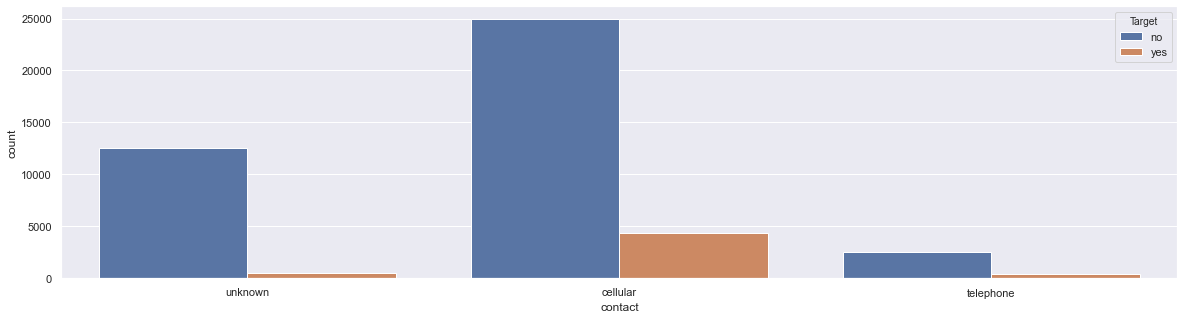

In [37]:
fig = plt.figure(figsize=[20,5])
sns.countplot(data=bankData, x='contact', hue='Target');

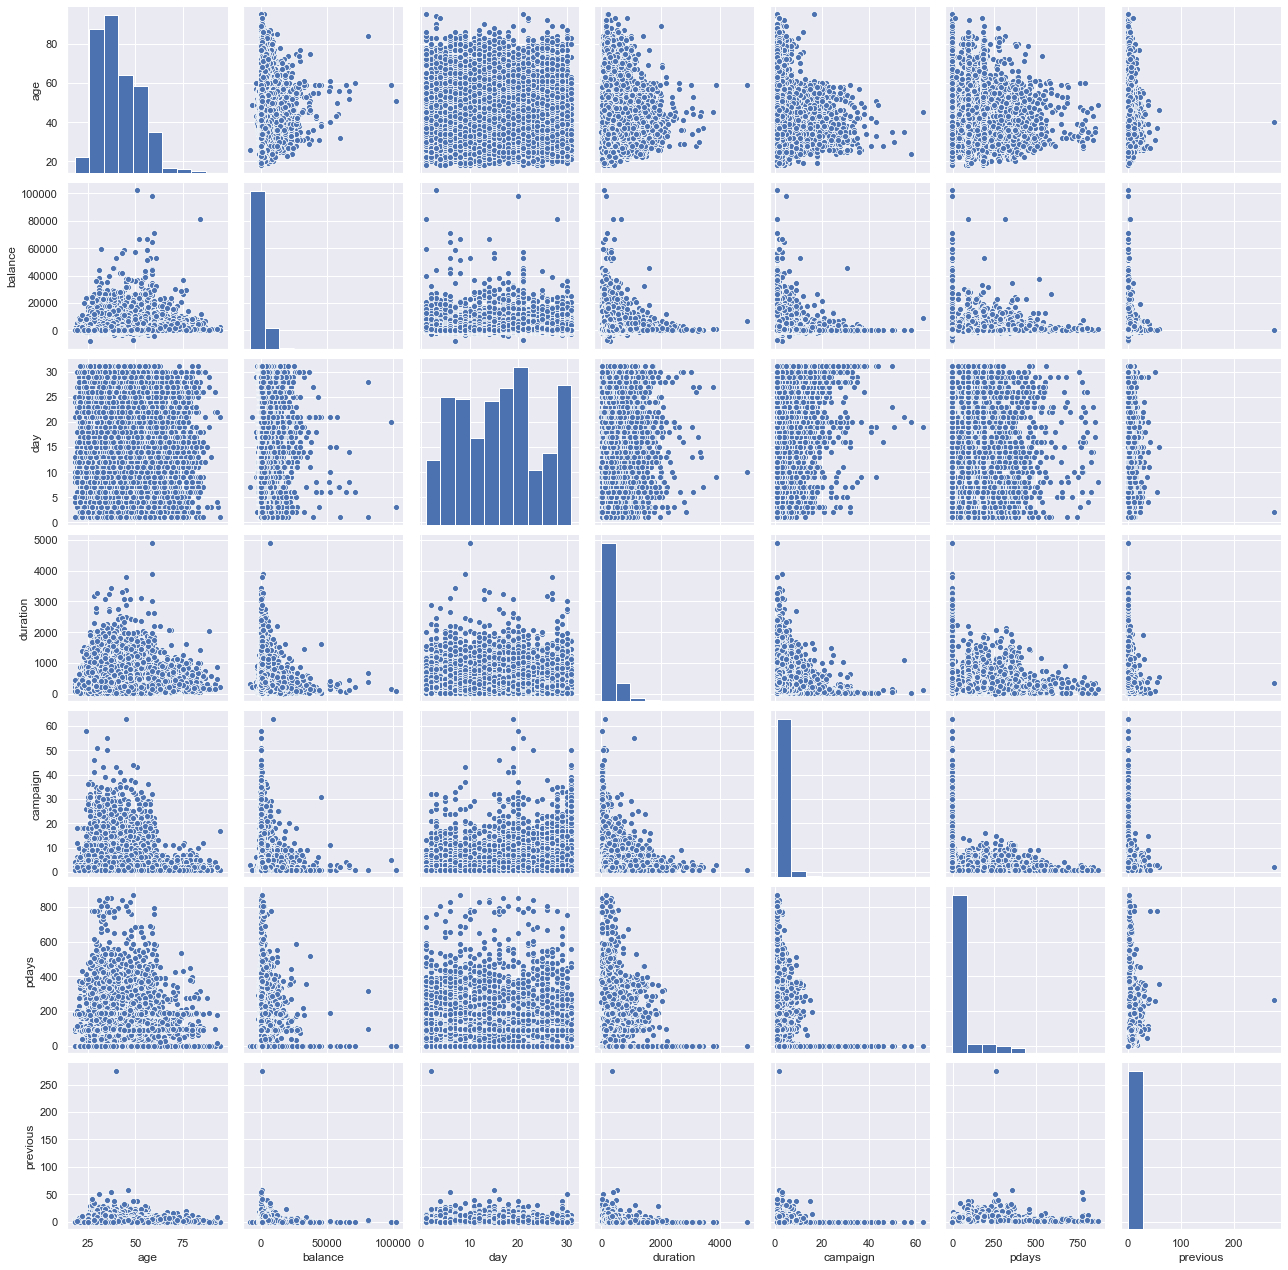

In [38]:
# Pair Plot
sns.pairplot(bankData);

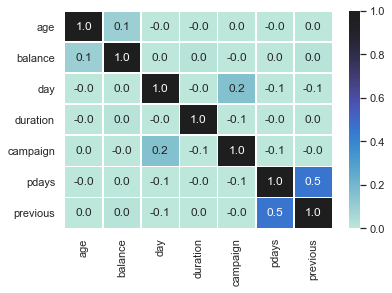

In [39]:
# Heatmap
sns.heatmap(bankData.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1, vmin=0, vmax=1);

## Deliverable – 2

### Prepare the data for analytics

## Data Transformation

### Simple Value Replacement - month column

In [40]:
# Convert months into numeric values

bankData.loc[bankData['month'] == 'jan', 'month'] = 1
bankData.loc[bankData['month'] == 'feb', 'month'] = 2
bankData.loc[bankData['month'] == 'mar', 'month'] = 3
bankData.loc[bankData['month'] == 'apr', 'month'] = 4
bankData.loc[bankData['month'] == 'may', 'month'] = 5
bankData.loc[bankData['month'] == 'jun', 'month'] = 6
bankData.loc[bankData['month'] == 'jul', 'month'] = 7
bankData.loc[bankData['month'] == 'aug', 'month'] = 8
bankData.loc[bankData['month'] == 'sep', 'month'] = 9
bankData.loc[bankData['month'] == 'oct', 'month'] = 10
bankData.loc[bankData['month'] == 'nov', 'month'] = 12
bankData.loc[bankData['month'] == 'dec', 'month'] = 12

# Then convert data type
bankData = bankData.astype({'month': 'int64'})

### One-Hot encoding for categorical columns

In [41]:
# Get dummies for categorical columns

catCols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'Target']
bankData = pd.get_dummies(bankData, columns=catCols, drop_first=True)
bankData.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,Target_yes
0,58,2143,5,5,261,1,-1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,44,29,5,5,151,1,-1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,33,2,5,5,76,1,-1,0,0,1,...,0,0,1,1,0,1,0,0,1,0
3,47,1506,5,5,92,1,-1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
4,33,1,5,5,198,1,-1,0,0,0,...,1,0,0,0,0,1,0,0,1,0


### Binning - duration, age, balance, pdays columns

In [42]:
# duration is defined in 'seconds' and has variety of values. Let's convert to minutes first - with nearest full minute.

bankData['durationMin'] = 0

for indx, rw in bankData.iterrows():
    if rw['duration'] > 0 and rw['duration'] < 60:
        bankData.at[indx, 'durationMin'] = 1
    elif rw['duration'] > 60:
        bankData.at[indx, 'durationMin'] = math.ceil(rw['duration']/60)
        
print(len(bankData['durationMin'].unique()))

# After conversion of duration to minutes, it has 57 unique values.
# Lets create bins of 5 mins each

durationBins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
durationBinLabels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', 
                     '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90']

bankData['durationBin'] = pd.cut(bankData['durationMin'], bins=durationBins, labels=durationBinLabels)
print(bankData['durationBin'].unique())

# Then set the duration codes for each bin category
# Converting categorical values into numbers as per their order

bankData['durationCat'] = bankData['durationBin'].cat.codes
print(bankData['durationCat'].unique())

57
[0-5, 6-10, 26-30, 21-25, 11-15, ..., 56-60, 51-55, 61-65, 46-50, 81-85]
Length: 15
Categories (14, object): [0-5 < 6-10 < 11-15 < 16-20 ... 51-55 < 56-60 < 61-65 < 81-85]
[ 0  1  5  4  2  3  6 -1  7  8 11 10 12  9 16]


In [43]:
# Age binning

ageBins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
ageBinLabels = ['18-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', 
                '66-70', '71-75', '76-80', '81-85', '86-90', '91-95']

bankData['ageBin'] = pd.cut(bankData['age'], bins=ageBins, labels=ageBinLabels)
print(bankData['ageBin'].unique())

bankData['ageCat'] = bankData['ageBin'].cat.codes
print(bankData['ageCat'].unique())

[56-60, 41-45, 31-35, 46-50, 26-30, ..., 81-85, 71-75, 76-80, 86-90, 91-95]
Length: 16
Categories (16, object): [18-20 < 21-25 < 26-30 < 31-35 ... 76-80 < 81-85 < 86-90 < 91-95]
[ 8  5  3  6  2  7  1  4  9  0 10 13 11 12 14 15]


In [44]:
# pdays binning

# As per the description of pdays: number of days that passed by after the client was last contacted from a previous campaign 
    # (-1 tells us the person has not been contacted or contact period is beyond 900 days)

# Lets replace -1 with 900
bankData.loc[bankData['pdays'] == -1, 'pdays'] = 900
#bankData.head()

pdayBins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900]
pdayBinLabels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', 
                '501-550', '551-600', '601-650', '651-700', '701-750', '751-800', '801-850', '851-900']

bankData['pdayBin'] = pd.cut(bankData['pdays'], bins=pdayBins, labels=pdayBinLabels)
print(bankData['pdayBin'].unique())

bankData['pdayCat'] = bankData['pdayBin'].cat.codes
print(bankData['pdayCat'].unique())

[851-900, 151-200, 51-100, 101-150, 0-50, ..., 601-650, 651-700, 751-800, 701-750, 801-850]
Length: 18
Categories (18, object): [0-50 < 51-100 < 101-150 < 151-200 ... 701-750 < 751-800 < 801-850 < 851-900]
[17  3  1  2  0  5  4  6  7  8  9 10 11 12 13 15 14 16]


In [45]:
# balance binning

balanceBins = [-10000, -5000, 0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 
               65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000]

balanceBinsLabels = ['n10k', 'n5k', '0', '5k', '10k', '15k', '20k', '25k', '30k', '35k', 
                     '40k', '45k', '50k', '55k', '60k', '65k', '70k', '75k', '80k'
                       '85k', '90k', '95k', '100k', '105k']

bankData['balanceBin'] = pd.cut(bankData['balance'], bins=balanceBins, labels=balanceBinsLabels)
print(bankData['balanceBin'].unique())

bankData['balanceCat'] = bankData['balanceBin'].cat.codes
print(bankData['balanceCat'].unique())

[0, n5k, 10k, 5k, 20k, ..., 65k, 100k, 105k, 70k, 80k85k]
Length: 20
Categories (20, object): [n10k < n5k < 0 < 5k ... 70k < 80k85k < 100k < 105k]
[ 2  1  4  3  6 11 13  5  7  9  8 12  0 10 14 15 21 22 16 18]


In [46]:
# Create a new dataset for analysis from bankData - consider only required columns.

requiredCols = ['day', 'month', 'campaign', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'Target_yes', 'durationCat', 'ageCat', 'pdayCat', 'balanceCat']

#len(requiredCols)

bankDataProcessed = bankData[requiredCols]

#bankDataProcessed.head()

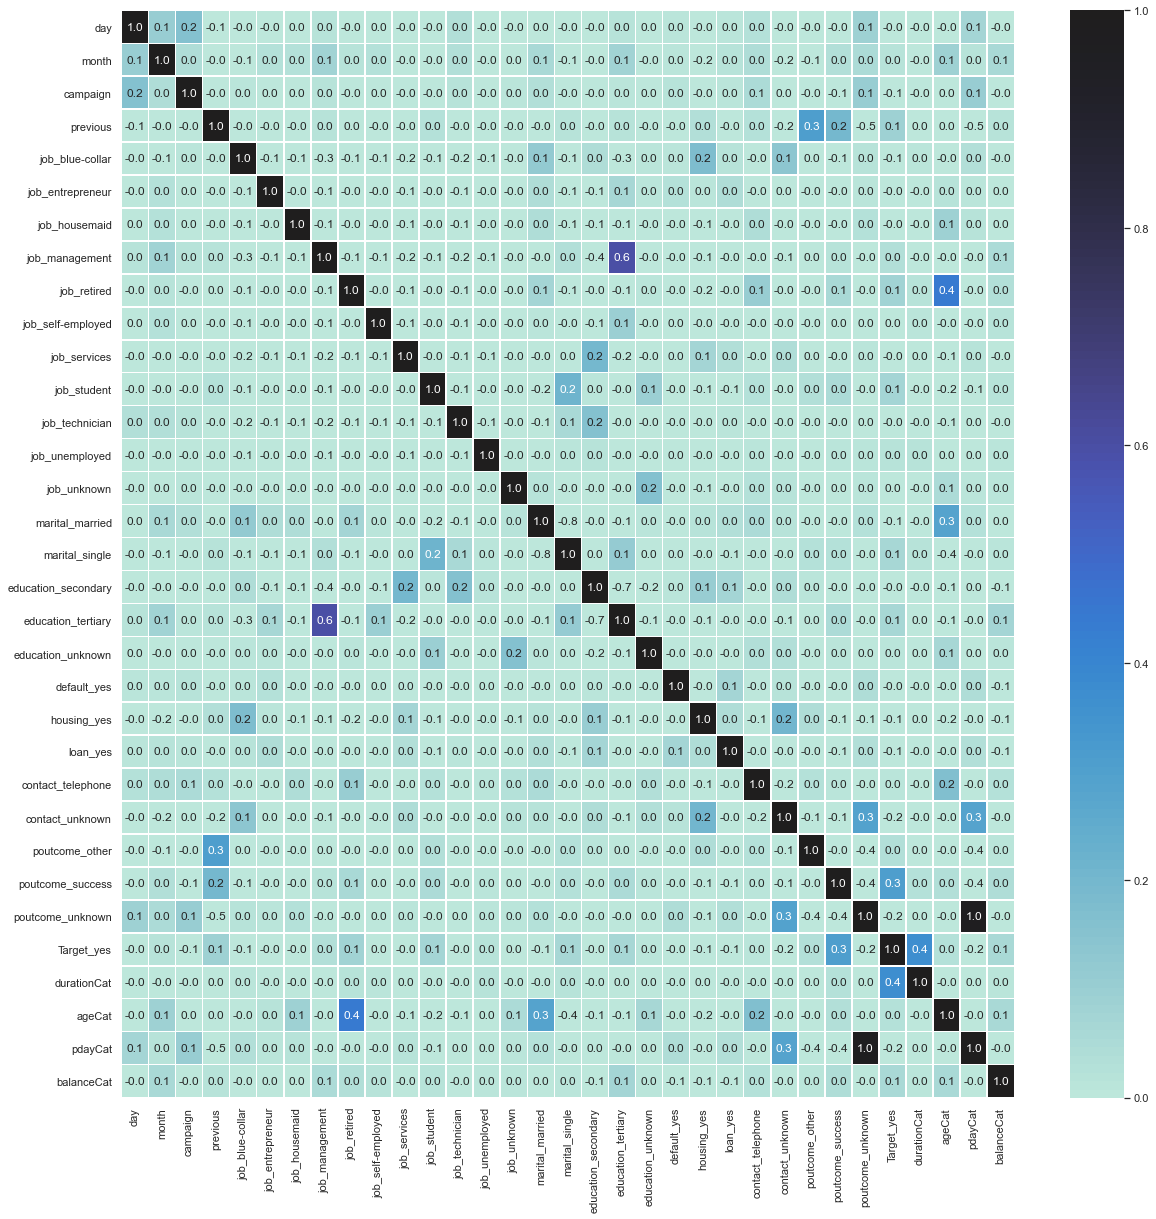

In [47]:
# Create a heatmap to see how the variables relate after data transformation.
fig = plt.figure(figsize=[20,20])
sns.heatmap(bankDataProcessed.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1, vmin=0, vmax=1);

## Data Split
Create the training set and test set in ratio of 70:30

In [48]:
# define variable for random state.
random = 7

# Create datasets for X (independent) variables.

X = bankDataProcessed.drop(columns=['Target_yes'])
X.head()

,day,month,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,durationCat,ageCat,pdayCat,balanceCat
0,5,5,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,8,17,2
1,5,5,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,5,17,2
2,5,5,1,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,3,17,2
3,5,5,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,6,17,2
4,5,5,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3,17,2


In [49]:
# Create datasets for Y (dependent) variables.

Y = bankDataProcessed[['Target_yes']].reset_index().drop(columns=['index'])
Y.head()

,Target_yes
0,0
1,0
2,0
3,0
4,0


In [50]:
# Split the data
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=random)

# Verify the split

print("Total Rows in Train Data: ", len(X_Train), '   ', len(X_Train)/rowCount*100, ' %')
print("Total Rows in Test Data: ", len(X_Test), '   ', len(X_Test)/rowCount*100, ' %')

print()

print("Original Set Target True Values: ",
      len(bankDataProcessed[bankDataProcessed['Target_yes'] == 1]),'  ',
len(bankDataProcessed[bankDataProcessed['Target_yes'] == 1]) / len(bankDataProcessed) * 100, ' %')

print("Original Set Target False Values: ",
      len(bankDataProcessed[bankDataProcessed['Target_yes'] == 0]),'  ',
len(bankDataProcessed[bankDataProcessed['Target_yes'] == 0]) / len(bankDataProcessed) * 100, ' %')

print()

print("Training Set Target True Values: ",
      len(Y_Train[Y_Train['Target_yes'] == 1]),'  ',
len(Y_Train[Y_Train['Target_yes'] == 1]) / len(Y_Train) * 100, ' %')

print("Training Set Target False Values: ",
      len(Y_Train[Y_Train['Target_yes'] == 0]),'  ',
len(Y_Train[Y_Train['Target_yes'] == 0]) / len(Y_Train) * 100, ' %')

print()

print("Test Set Target True Values: ",
      len(Y_Test[Y_Test['Target_yes'] == 1]),'  ',
len(Y_Test[Y_Test['Target_yes'] == 1]) / len(Y_Test) * 100, ' %')

print("Test Set Target False Values: ",
      len(Y_Test[Y_Test['Target_yes'] == 0]),'  ',
len(Y_Test[Y_Test['Target_yes'] == 0]) / len(Y_Test) * 100, ' %')

Total Rows in Train Data:  31647     69.99845170423127  %
Total Rows in Test Data:  13564     30.001548295768725  %

Original Set Target True Values:  5289    11.698480458295547  %
Original Set Target False Values:  39922    88.30151954170445  %

Training Set Target True Values:  3755    11.865263690081209  %
Training Set Target False Values:  27892    88.1347363099188  %

Test Set Target True Values:  1534    11.309348274845178  %
Test Set Target False Values:  12030    88.69065172515482  %


## Deliverable – 3

### Create the ensemble model

In [51]:
# Define dataframe to collect results
# Various model scores for testing dataset will be stored in this dataframe.

resultsFrame = pd.DataFrame(columns=['Regressor', 'True Positive', 'False Positive', 'True Negative', 'False Negative', 
    'Recall Score', 'Precision Score', 'Accuracy Score', 'F1 Score', 'ROC AUC Score', 'Parameters' ])


In [52]:
# Define a common function to fit the model and calculate various scores and return as a series.

def fitAndPredict(name, model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    accuracy = model.score(x_test, y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
    rocAuc = roc_auc_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    params = str(model.get_params())

    return pd.Series([name, tp, fp, tn, fn, recall, precision,
                                    accuracy, f1, rocAuc, params], index=resultsFrame.columns)

In [53]:
# Create Logistic Regression Model with various different parameters and record performance.

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalties = ['l1', 'l2', 'elasticnet', 'none']
classWeights = ['balanced', 'None']
multiClasses = ['auto', 'ovr', 'multinomial']

for s in solvers:
    for p in penalties:
        for clw in classWeights:
            for mlc in multiClasses:
                # During exeuction it is found that solver, penalty and other parameters sometimes needs to be a 
                # sepecific combination, so using try except to continue finding the best combination.
                  
                try:
                    if(clw=='None'):
                        logRegModel = LogisticRegression(random_state=random, 
                                                         penalty=p, solver=s, multi_class=mlc) 
                    else:
                        logRegModel = LogisticRegression(random_state=random, penalty=p, solver=s, 
                                                         class_weight=clw, multi_class=mlc)
                        
                    resultRow = fitAndPredict('LogisticRegression', logRegModel, X_Train, Y_Train, X_Test, Y_Test)
                    resultsFrame = resultsFrame.append(resultRow, ignore_index=True)
                except:
                    pass

In [54]:
# Create Decision Tree with various parameters and record performance.
criterion = ['gini', 'entropy']
splitter=['best', 'random']
classWeights = ['balanced', 'None']

for c in criterion:
    for s in splitter:
        for clw in classWeights:
            for m in range(1, 11, 1):
                try:
                    dTree = DecisionTreeClassifier(criterion=c, splitter=s, class_weight=clw, max_depth=m, random_state=random)
                    resultRow = fitAndPredict('DecisionTreeClassifier', dTree, X_Train, Y_Train, X_Test, Y_Test)
                    resultsFrame = resultsFrame.append(resultRow, ignore_index=True)
                except:
                    pass


In [55]:
# Create Bagging Classifier with various estimaters and record performance.

for e in range(50, 110, 50):
    bgcl = BaggingClassifier(n_estimators=e,random_state=random)
    resultRow = fitAndPredict('BaggingClassifier', bgcl, X_Train, Y_Train, X_Test, Y_Test)
    resultsFrame = resultsFrame.append(resultRow, ignore_index=True)

In [56]:
# Create RandomForest Classifier with various parameters and record performance.
criterion = ['gini', 'entropy']
for c in criterion:
    for e in range(50, 110, 50):
        rfcl = RandomForestClassifier(criterion=c, n_estimators=e, random_state=random)
        resultRow = fitAndPredict('RandomForestClassifier', rfcl, X_Train, Y_Train, X_Test, Y_Test)
        resultsFrame = resultsFrame.append(resultRow, ignore_index=True)

In [57]:
# Create Adaptive Boost Classifier with various parameters and record performance.
algorithm = ['SAMME', 'SAMME.R']
for a in algorithm:
    for e in range(50, 110, 50):
        abcl = AdaBoostClassifier(algorithm=a, n_estimators=e, random_state=random)
        resultRow = fitAndPredict('AdaBoostClassifier', abcl, X_Train, Y_Train, X_Test, Y_Test)
        resultsFrame = resultsFrame.append(resultRow, ignore_index=True)

In [58]:
# Create Gradient Boosting Classifier with various parameters and record performance.
criterion = ['friedman_mse', 'mse'] # not using 'mae' as it is taking long to run.
for c in criterion:
    for e in range(50, 110, 50):
        gbcl = GradientBoostingClassifier(criterion=c, n_estimators=e, random_state=random)
        resultRow = fitAndPredict('GradientBoostingClassifier', gbcl, X_Train, Y_Train, X_Test, Y_Test)
        resultsFrame = resultsFrame.append(resultRow, ignore_index=True)

In [59]:
resultsFrame

,Regressor,True Positive,False Positive,True Negative,False Negative,Recall Score,Precision Score,Accuracy Score,F1 Score,ROC AUC Score,Parameters
0,LogisticRegression,1185,2028,10002,349,0.772490,0.368814,0.824757,0.499263,0.801956,"{'C': 1.0, 'class_weight': 'balanced', 'dual':..."
1,LogisticRegression,1185,2028,10002,349,0.772490,0.368814,0.824757,0.499263,0.801956,"{'C': 1.0, 'class_weight': 'balanced', 'dual':..."
2,LogisticRegression,1185,2027,10003,349,0.772490,0.368929,0.824830,0.499368,0.801997,"{'C': 1.0, 'class_weight': 'balanced', 'dual':..."
3,LogisticRegression,491,277,11753,1043,0.320078,0.639323,0.902684,0.426586,0.648526,"{'C': 1.0, 'class_weight': None, 'dual': False..."
4,LogisticRegression,491,277,11753,1043,0.320078,0.639323,0.902684,0.426586,0.648526,"{'C': 1.0, 'class_weight': None, 'dual': False..."
...,...,...,...,...,...,...,...,...,...,...,...
111,AdaBoostClassifier,542,334,11696,992,0.353325,0.618721,0.902241,0.449793,0.662780,"{'algorithm': 'SAMME.R', 'base_estimator': Non..."
112,GradientBoostingClassifier,501,291,11739,1033,0.326597,0.632576,0.902389,0.430782,0.651204,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."
113,GradientBoostingClassifier,570,334,11696,964,0.371578,0.630531,0.904306,0.467596,0.671907,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."
114,GradientBoostingClassifier,501,291,11739,1033,0.326597,0.632576,0.902389,0.430782,0.651204,"{'ccp_alpha': 0.0, 'criterion': 'mse', 'init':..."


In [60]:
comparedResults = resultsFrame.groupby(by='Regressor').agg(
    {
        'Accuracy Score': np.max,
        'Recall Score': np.max,
        'Precision Score': np.max,
        'F1 Score': np.max,
        'ROC AUC Score': np.max
    })

In [61]:
# Comparison by Accuracy score
comparedResults.sort_values(by='Accuracy Score',ascending=False)

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Regressor,,,,,
GradientBoostingClassifier,0.904306,0.371578,0.632576,0.467596,0.671907
LogisticRegression,0.902757,0.779009,0.647746,0.501475,0.804106
AdaBoostClassifier,0.902315,0.363103,0.626055,0.454323,0.666547
RandomForestClassifier,0.901873,0.378748,0.607025,0.466105,0.673663
BaggingClassifier,0.899145,0.457627,0.567044,0.506494,0.706536
DecisionTreeClassifier,0.894279,0.868970,0.613636,0.517118,0.828152


### Based on Accuracy Score, GradientBoostingClassifier is best.

In [62]:
# Comparison by F1 Score
comparedResults.sort_values(by='F1 Score',ascending=False)

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Regressor,,,,,
DecisionTreeClassifier,0.894279,0.868970,0.613636,0.517118,0.828152
BaggingClassifier,0.899145,0.457627,0.567044,0.506494,0.706536
LogisticRegression,0.902757,0.779009,0.647746,0.501475,0.804106
GradientBoostingClassifier,0.904306,0.371578,0.632576,0.467596,0.671907
RandomForestClassifier,0.901873,0.378748,0.607025,0.466105,0.673663
AdaBoostClassifier,0.902315,0.363103,0.626055,0.454323,0.666547


### Based on F1 Score, DecisionTreeClassifier is best.

# Conclusion

As per the problem statement, the objective of the model is to increase the hit ratio of the marketing team for the term deposit.

Thus, the True Positive and True Negative are more important than the False Positive and False Negatives. So that, the marketing team can call the customers appearing in the True Positive set and avoid calling customers appearing in True Negative set, to increase the hit ratio (of number of calls against the customers subscribed for deposit).

Because of more weightage to the True Positives and True Negatives to increate the hit ratio, Accuracy of the model is more important. As seen above, <u><b>Gradient Boosting Classifier is the preferred model</b></u> because of high accuracy score.